# 第2部　Pythonによる時系列分析の基本

## 第6章　時系列データのシミュレーションと見せかけの回帰

### 分析の準備

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 統計モデルを推定するライブラリ
import statsmodels.api as sm
import statsmodels.formula.api as smf

# グラフの日本語表記
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Meiryo'

In [2]:
# 表示設定
np.set_printoptions(linewidth=60)
pd.set_option('display.width', 60)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

### 正規ホワイトノイズ系列のシミュレーション

In [3]:
# 乱数の種
np.random.seed(1)
# 正規分布に従う乱数の生成
# 从均值为 0 标准差为 1 的正态分布中，生成 4 个数
stats.norm.rvs(loc=0, scale=1, size=4)

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862])

findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not foun

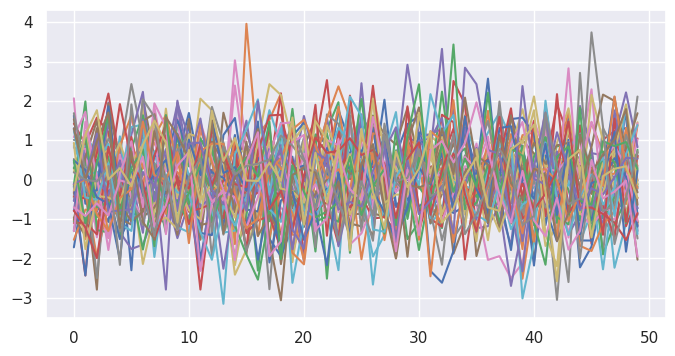

In [6]:
# 生成する系列の数
n_sim = 50

# 乱数の種
np.random.seed(1)

# 正規ホワイトノイズ系列の作成と可視化
for i in range(1, n_sim):
    # 从正态分布白噪声里面采样 50 个数据
    hn = stats.norm.rvs(loc=0, scale=1, size=50)
    # 把这 50 个数据绘制成折线图
    sns.lineplot(x = range(0, 50), y=hn)

### ランダムウォーク系列のシミュレーション

In [7]:
# 乱数の種
np.random.seed(1)
# 正規分布に従う乱数の累積和を作成し、ランダムウォーク系列を作る
# 生成四个随机数后算前缀和
np.cumsum(stats.norm.rvs(loc=0, scale=1, size=4))

array([ 1.62434536,  1.01258895,  0.4844172 , -0.58855142])

findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not foun

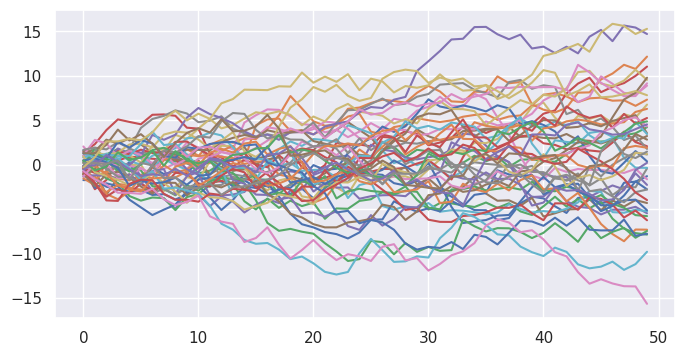

In [ ]:
# 生成する系列の数
n_sim = 50

# 乱数の種
np.random.seed(1)

# ランダムウォーク系列の作成と可視化
for i in range(1, n_sim):
    # 生成 4 个随机数，计算前缀和，然后绘制折线图
    rw = np.cumsum(stats.norm.rvs(loc=0, scale=1, size=50))
    sns.lineplot(x = range(0, 50), y=rw)

### 正規ホワイトノイズ系列への線形回帰分析

#### 回帰直線

findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not foun

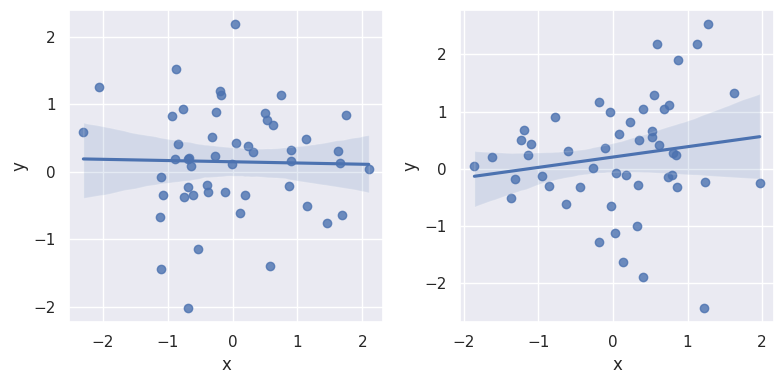

In [9]:
# 乱数の種
np.random.seed(1)

# 2列のグラフを作る     绘制两个并列的散点图
fig, ax = plt.subplots(figsize=(8, 4), ncols=2, tight_layout=True)

# 正規ホワイトノイズ系列を2つ作って、回帰直線を図示する
for i in range(0, 2):
    # シミュレーションデータの作成
    x = stats.norm.rvs(loc=0, scale=1, size=50) # 生成 50 个数为 x 坐标
    y = stats.norm.rvs(loc=0, scale=1, size=50) # 生成 50 个数为 y 坐标
    data_sim = pd.DataFrame({"x":x,"y":y})      # 合并在一起

    # 回帰直線
    sns.regplot(x='x', y='y', data=data_sim, ax=ax[i])  # 在散点图叠加线性回归直线

### F比の分布

在统计学和回归分析中，“F 值（F 值检验 / F Statistic）”指的是用于衡量回归模型整体显著性、或者比较不同方差（模型拟合效果、组间差异等）的一个统计量。它通常出现在线性回归、方差分析 (ANOVA) 等场景下。

如果 F 值大，意味着自变量（或组间）差异大于误差（或组内差异），更有理由认为模型或组间确实存在显著差异；若 F 值小，则说明数据无法提供足够证据拒绝原假设。

In [10]:
# シミュレーションの回数
n_sim = 1000

# F比を保存する入れ物
f_ratio_array = np.zeros(n_sim)

# シミュレーションの実施
np.random.seed(1)
for i in range(1, n_sim):
    # シミュレーションデータの作成
    x = stats.norm.rvs(loc=0, scale=1, size=50)
    y = stats.norm.rvs(loc=0, scale=1, size=50)
    data_sim = pd.DataFrame({"x":x,"y":y})
    
    # 回帰分析の実行   最小二乘回归
    lm_model_sim = smf.ols(formula='y ~ x', data=data_sim).fit()
    
    # F比の取得     计算 F 值
    f_ratio_array[i] = lm_model_sim.fvalue

In [11]:
# 参考：モデルの自由度(群間変動の自由度)
# 回归模型的自由度，也就是模型中的 可估计参数数目-1
# 例如，最简单的线性模型 y = a_{1}x + a_{0}，有2个可估计参数，自由度为 1
lm_model_sim.df_model

# 备注：自由度可以理解为：“可让模型在数据拟合中自由变动的参数数量”

1.0

In [12]:
# 残差の自由度(群内変動の自由度)    残差自由度
# 残差自由度定义为： df_{resid} = N - k
# N 是有多少个数据点可供回归，k 是模型中有多少个参数
# 本例中的 残差自由度=50-2=48
lm_model_sim.df_resid

# 备注：为什么要关注残差自由度？
# 在估计残差方差 ( 𝜎2) 或在构建置信区间与显著性检验时，需要使用残差自由度 (例如在检验统计量中出现 N−k；计算 F 检验时，分母对应的自由度也是残差自由度

48.0

<Axes: xlabel='x', ylabel='Density'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not foun

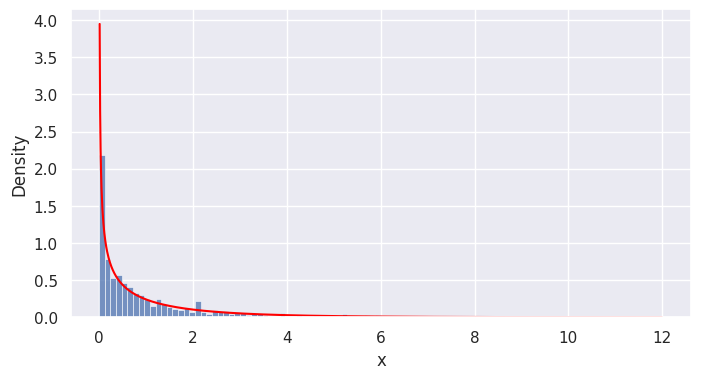

In [13]:
# F比のヒストグラム     绘制 F 值，纵轴为密度，F数据划分为100个区间（100个柱子）
sns.histplot(f_ratio_array, stat="density", bins=100)

# F分布の折れ線グラフ
f_df = pd.DataFrame({'x':np.arange(0, 12, 0.01)})
# F分布概率密度函数，1 和 48 是 F 分布的分子自由度，分母自由度
f_df['density'] = stats.f.pdf(f_df.x, dfn=1, dfd=48)
# 绘制 F 值曲线
sns.lineplot(x='x', y='density', data=f_df, color='red')

#### F検定

In [14]:
# F分布の95％点
# 获取指定分位数（95%百分位数）所对应的 F 值
# 即：F 分布中有 95% 的概率落在这个值之下，5% 的概率落在这个值之上。
stats.f.ppf(q=0.95, dfn=1, dfd=48)

4.042652128566653

In [15]:
# 間違って帰無仮説を棄却してしまう確率
# 之前得到的 F 值数组（f_ratio_array）里，有多少比例的 F 值超过特定的临界值（这里是 F 分布在 95% 分位对应的数）
sum(f_ratio_array > stats.f.ppf(q=0.95, dfn=1, dfd=48)) / n_sim

0.046

### ランダムウォーク系列への回帰分析

#### 回帰直線

findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not foun

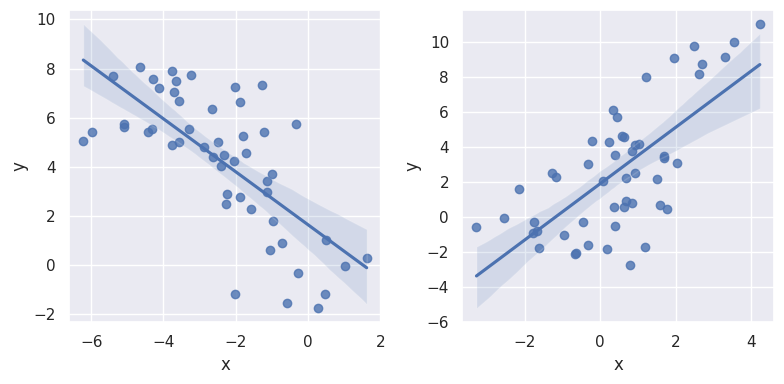

In [16]:
# 乱数の種
np.random.seed(1)

# 2列のグラフを作る
fig, ax = plt.subplots(figsize=(8, 4), ncols=2, tight_layout=True)

# ランダムウォーク系列を2つ作って、回帰直線を図示する
for i in range(0, 2):
    # シミュレーションデータの作成
    x_rw = np.cumsum(stats.norm.rvs(loc=0, scale=1, size=50))
    y_rw = np.cumsum(stats.norm.rvs(loc=0, scale=1, size=50))
    data_sim = pd.DataFrame({"x":x_rw, "y":y_rw})

    # 散布図
    sns.regplot(x='x', y='y', data=data_sim, ax=ax[i])

#### F比の分布

In [17]:
# シミュレーションの回数
n_sim = 1000

# F比を保存する入れ物
f_ratio_array_rw = np.zeros(n_sim)

# シミュレーションの実施
# 每次生成两个随机游走序列 x 和 y，用线性回归拟合，把计算得到的 F 值存起来
np.random.seed(1)
for i in range(1, n_sim):
    # シミュレーションデータの作成
    x_rw = np.cumsum(stats.norm.rvs(loc=0, scale=1, size=50))
    y_rw = np.cumsum(stats.norm.rvs(loc=0, scale=1, size=50))
    data_sim = pd.DataFrame({"x":x_rw, "y":y_rw})
    
    # 回帰分析の実行
    lm_model_sim = smf.ols(formula='y ~ x', data=data_sim).fit()
    
    # F比の取得
    f_ratio_array_rw[i] = lm_model_sim.fvalue

<Axes: ylabel='Density'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not foun

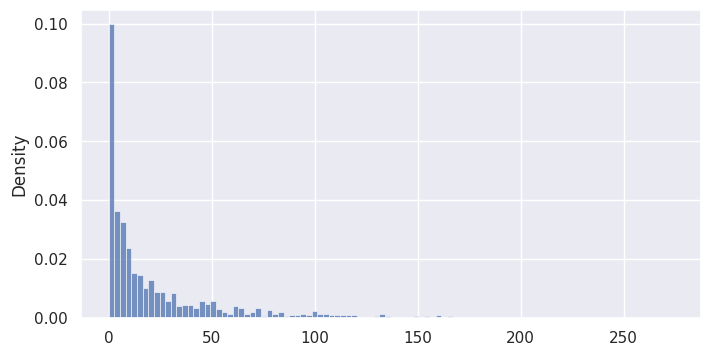

In [18]:
# F比のヒストグラム
# 绘制 F 值的直方图
sns.histplot(f_ratio_array_rw, stat="density", bins=100)

#### ゆがんだ標本分布と見せかけの回帰

In [19]:
# 間違って帰無仮説を棄却してしまう確率
# 计算模拟得到的 F 值数组（f_ratio_array_rw）中，落在 F 分布 95% 分位点之上（超过理论临界值）的比例
sum(f_ratio_array_rw > stats.f.ppf(q=0.95, dfn=1, dfd=48)) / n_sim

0.668

### 回帰係数のばらつき

#### シミュレーションの実施

In [20]:
# シミュレーションの回数
n_sim = 1000

# 回帰係数を保存する入れ物
coef_array    = np.zeros(n_sim)     # 回归系数
coef_array_rw = np.zeros(n_sim)     # Durbin-Watson统计量（dw）：检验自相关性（尤其在时间序列中）的一种指标

# Durbin-Watson統計量を保存する入れ物
dw_array    = np.zeros(n_sim)
dw_array_rw = np.zeros(n_sim)

# シミュレーションの実施
np.random.seed(1)
for i in range(1, n_sim):
    # シミュレーションデータの生成
    x = stats.norm.rvs(loc=0, scale=1, size=50)
    y = stats.norm.rvs(loc=0, scale=1, size=50)
    data_sim    = pd.DataFrame({"x":x,           "y":y})    
    data_sim_rw = pd.DataFrame({"x":np.cumsum(x),"y":np.cumsum(y)})
    
    # モデル化
    lm_model_sim    = smf.ols(formula='y ~ x', data=data_sim   ).fit()
    lm_model_sim_rw = smf.ols(formula='y ~ x', data=data_sim_rw).fit()
    
    # 回帰係数の格納
    coef_array[i]    = lm_model_sim.params['x']
    coef_array_rw[i] = lm_model_sim_rw.params['x']
    
    # Durbin-Watson統計量の格納
    dw_array[i]    = sm.stats.stattools.durbin_watson(lm_model_sim.resid)
    dw_array_rw[i] = sm.stats.stattools.durbin_watson(lm_model_sim_rw.resid)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not foun

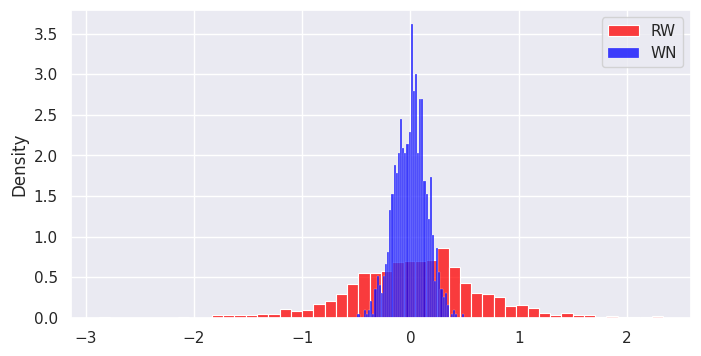

In [21]:
# 回帰係数のヒストグラム
sns.histplot(coef_array_rw, stat="density", label='RW', bins=50, color='red')
sns.histplot(coef_array,    stat="density", label='WN', bins=50, color='blue')

# 凡例
plt.legend()

In [20]:
print('正規ホワイトノイズ系列の回帰係数', np.mean(coef_array))
print('ランダムウォーク系列の回帰係数　', np.mean(coef_array_rw))

正規ホワイトノイズ系列の回帰係数 0.0040539533426812305
ランダムウォーク系列の回帰係数　 0.04061012928383667


### Durbin-Watson統計量

#### 実装

In [22]:
# シミュレーションデータの生成
np.random.seed(1)
x_rw = np.cumsum(stats.norm.rvs(loc=0, scale=1, size=50))
y_rw = np.cumsum(stats.norm.rvs(loc=0, scale=1, size=50))
data_rw_sim = pd.DataFrame({"x":x_rw, "y":y_rw})

# モデルの構築
lm_model = smf.ols(formula='y ~ x', data=data_rw_sim).fit()

# 結果の確認
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     47.70
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           1.02e-08
Time:                        23:02:54   Log-Likelihood:                -104.41
No. Observations:                  50   AIC:                             212.8
Df Residuals:                      48   BIC:                             216.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.466      3.518      0.0

In [23]:
# Durbin-Watson統計量の取得
# 返回一个数值 (0~4)，用于衡量回归模型残差序列的自相关性：
# 约 2：残差无显著自相关；小于 2：可能存在正自相关；大于 2：可能存在负自相关
sm.stats.stattools.durbin_watson(lm_model.resid)

0.4189076267042925

findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not foun

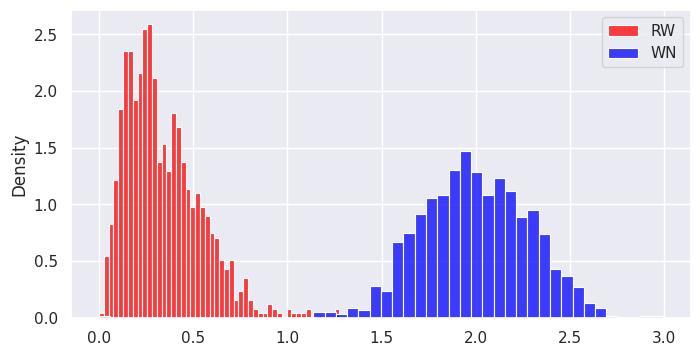

In [ ]:
# Durbin-Watson統計量のヒストグラム
sns.histplot(dw_array_rw, stat="density", label='RW', bins=50, color='red')     # 随机游走
sns.histplot(dw_array,    stat="density", label='WN', bins=50, color='blue')    # 白噪声

# 凡例
plt.legend()